In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv("C:\\Users\\İdris Aydın\\Desktop\\Mobile-Price-Prediction-cleaned_data.csv")
df

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799


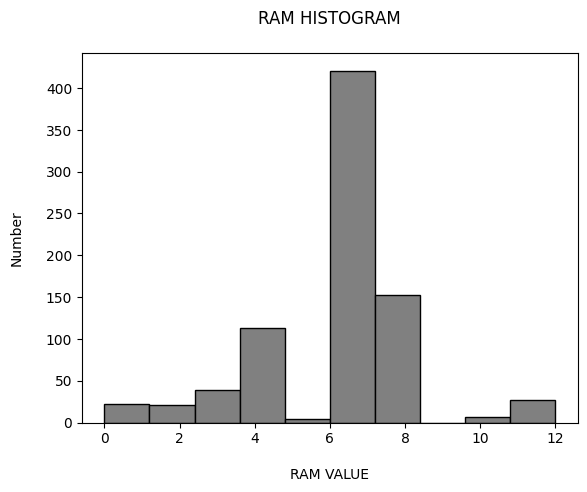

In [135]:
plt.hist(df[['RAM']], bins = 10, edgecolor = 'black', color = 'gray')
plt.title("RAM HISTOGRAM\n")
plt.xlabel("\nRAM VALUE")
plt.ylabel("Number\n")

plt.show()

In [136]:
from sklearn.model_selection import train_test_split

In [148]:
X = df[['RAM']]
y = df[['Price']]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
lr = LinearRegression()

In [156]:
lr.fit(X_train, y_train)

LinearRegression()

In [157]:
prediction = lr.predict(X_test)

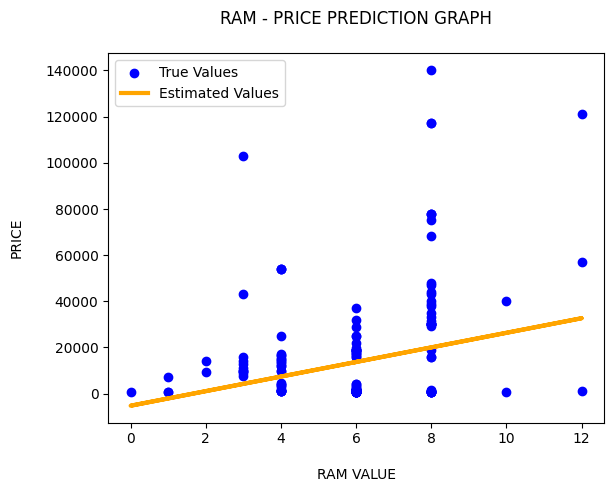

In [166]:
plt.scatter(X_test,y_test, color = 'blue', label = 'True Values')
plt.plot(X_test, prediction, color = 'orange', label = 'Estimated Values', linewidth = 3)
plt.title("RAM - PRICE PREDICTION GRAPH\n")
plt.xlabel("\nRAM VALUE")
plt.ylabel("PRICE\n")
plt.legend()

plt.show()

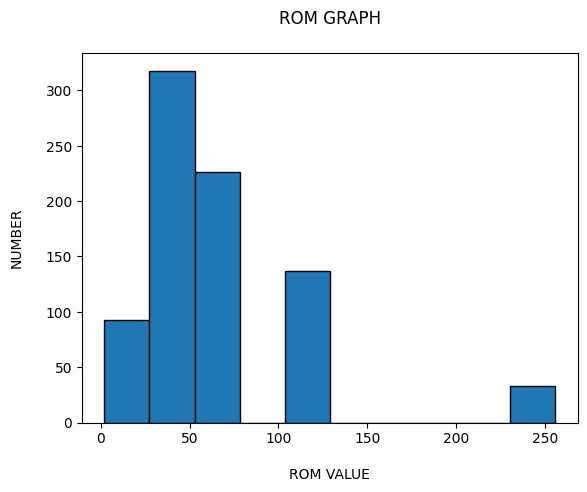

In [174]:
plt.hist(df[['ROM']], bins = 10, edgecolor = 'black')
plt.title("ROM GRAPH\n")
plt.xlabel("\nROM VALUE")
plt.ylabel("NUMBER\n")

plt.show()

In [202]:
X = df[['ROM']]
y = df[['Price']]

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [204]:
lr = LinearRegression()

In [209]:
lr.fit(X_train, y_train)

LinearRegression()

In [221]:
prediction = lr.predict(X_test)

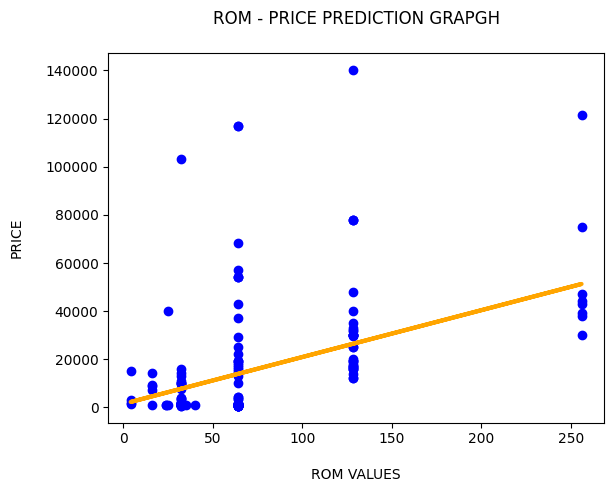

In [223]:
plt.scatter(X_test, y_test, color = 'blue', label = 'True Values')
plt.plot(X_test, prediction, color = 'orange', label = 'Estimated Values', linewidth = 3)
plt.title("ROM - PRICE PREDICTION GRAPGH\n")
plt.xlabel("\nROM VALUES")
plt.ylabel("PRICE\n")

plt.show()

In [225]:
X = df[['RAM', 'ROM']]
y = df['Price']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [228]:
lr = LinearRegression()

In [229]:
lr.fit(X_train, y_train)

LinearRegression()

In [241]:
prediction = lr.predict(X_test)

C:\Users\İdris Aydın\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


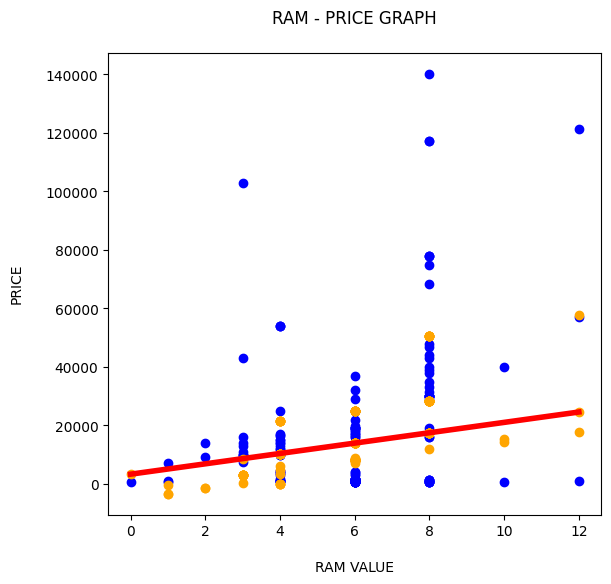

C:\Users\İdris Aydın\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


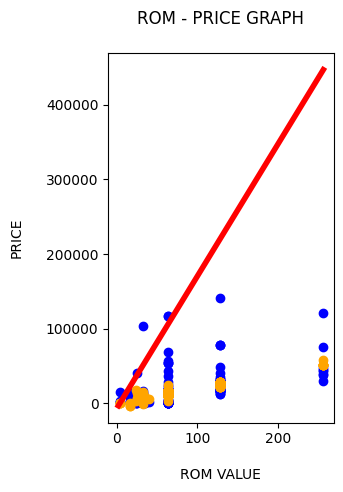

In [268]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)

plt.scatter(X_test['RAM'], y_test, color = 'blue', label = 'True Values')
plt.scatter(X_test['RAM'], prediction, color = 'orange', label = 'Estimated Values')

ram_range = np.linspace(X['RAM'].min(), X['RAM'].max(), 100).reshape(-1, 1)
rom_mean = np.mean(X['ROM'])
price_prediction = lr.predict(np.hstack([ram_range, np.full_like(ram_range, rom_mean)]))
plt.plot(ram_range, price_prediction, color = 'red', linewidth = 4)
plt.title("RAM - PRICE GRAPH\n")
plt.xlabel("\nRAM VALUE")
plt.ylabel("PRICE\n")


plt.show()


plt.subplot(1,2,2)

plt.scatter(X_test['ROM'], y_test, color = 'blue', label = 'True Values')
plt.scatter(X_test['ROM'], prediction, color = 'orange', label = 'Estimated Values')

ram_range = np.linspace(X['ROM'].min(), X['ROM'].max(), 100).reshape(-1, 1)
rom_mean = np.mean(X['RAM'])
price_prediction = lr.predict(np.hstack([ram_range, np.full_like(ram_range, rom_mean)]))
plt.plot(ram_range, price_prediction, color = 'red', linewidth = 4)
plt.title("ROM - PRICE GRAPH\n")
plt.xlabel("\nROM VALUE")
plt.ylabel("PRICE\n")

plt.show()

In [273]:
print("RAM Coefficient:", round(lr.coef_[0],3))
print("ROM Coefficient:", round(lr.coef_[1], 3))

RAM Coefficient: 1770.908
ROM Coefficient: 173.131


In [275]:
corr_matrix = df[['RAM','ROM','Price']].corr()
print(corr_matrix)

            RAM       ROM     Price
RAM    1.000000  0.332631  0.298383
ROM    0.332631  1.000000  0.474928
Price  0.298383  0.474928  1.000000


In [282]:
# Price estimation for random RAM and ROM values according to the above study.

# For example: RAM: 4.5 and ROM: 32

newData = pd.DataFrame({
    'RAM': [5.5],
    'ROM': [32]
})

predictedPrice = lr.predict(newData)
print("Predicted Price for 5.5 GB RAM and 32GB ROM:", round(predictedPrice[0], 3), "$")

Predicted Price for 5.5 GB RAM and 32GB ROM: 7469.845 $
